# TP3

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - María Fabiana Cid
#### - Yessika Arrieta

TP3▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material TPs/TP3

### Images a partir del template Material_TPs/TP3/template

1. **(4 puntos)** Obtener una detección del logo en cada imagen sin falsos positivos.
2. **(4 puntos)** Plantear y validar un algoritmo para múltiples detecciones en la imagen `coca_multi.png` con el mismo template del ítem 1.
3. **(2 puntos)** Generalizar el algoritmo del ítem 2 para todas las imágenes. 

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [2]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Imagen shape:(598, 799, 3)
Template shape:(175, 400)


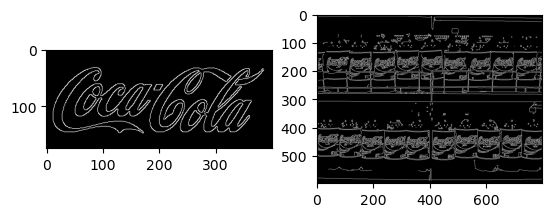

In [3]:
# Cargamos la imagen a procesar
img = cv.imread('./images/coca_multi.png')
template = cv.imread('./template/pattern.png',0)

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Aplico Canny
#=============
template = cv.Canny(template, threshold1=100, threshold2=500)
img_gray = cv.Canny(img, threshold1=100, threshold2=600)


print('Imagen shape:' + str(img.shape))
print('Template shape:' + str(template.shape))



plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.show()

Max value for cv.TM_CCOEFF at scale 0.20: 2581630.75


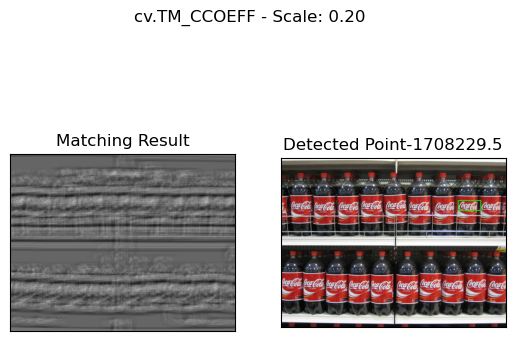

Max value for cv.TM_CCOEFF_NORMED at scale 0.20: 0.13758550584316254


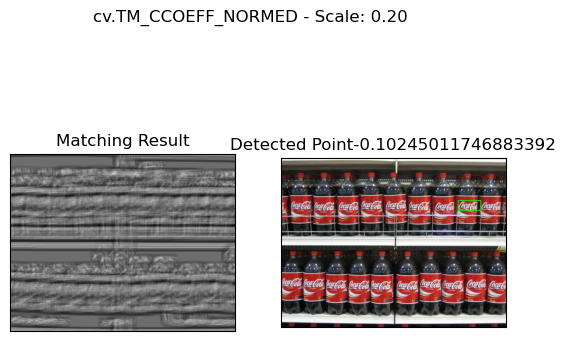

Max value for cv.TM_CCORR at scale 0.20: 5592150.0


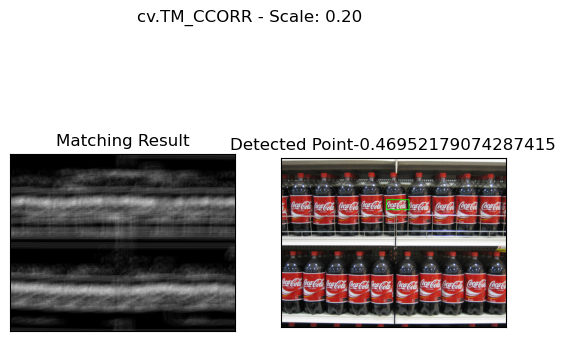

Max value for cv.TM_CCORR_NORMED at scale 0.20: 0.23820021748542786


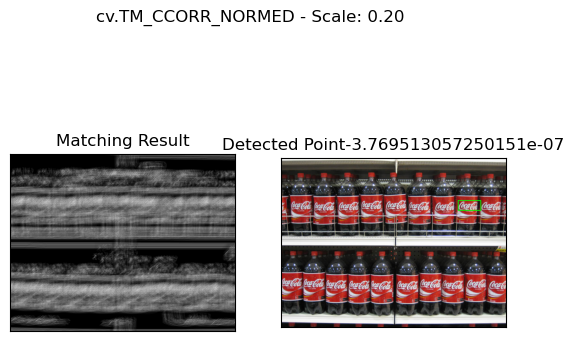

Min value for cv.TM_SQDIFF at scale 0.20: 11444400.0


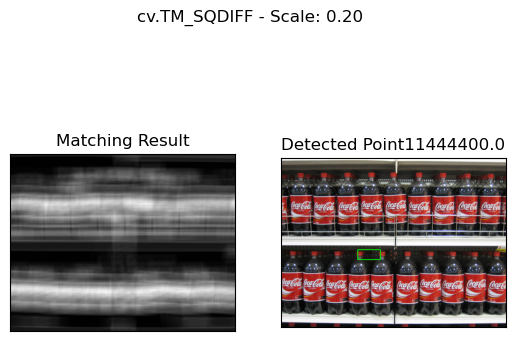

Min value for cv.TM_SQDIFF_NORMED at scale 0.20: 1.0


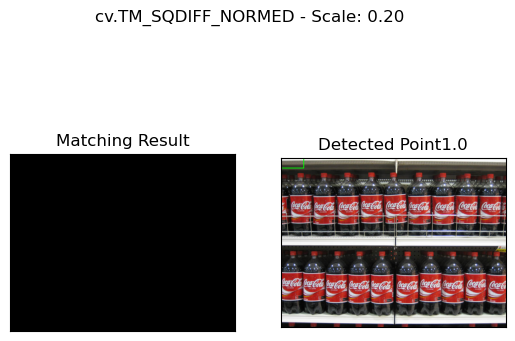

Max value for cv.TM_CCOEFF at scale 0.51: 6702606.5


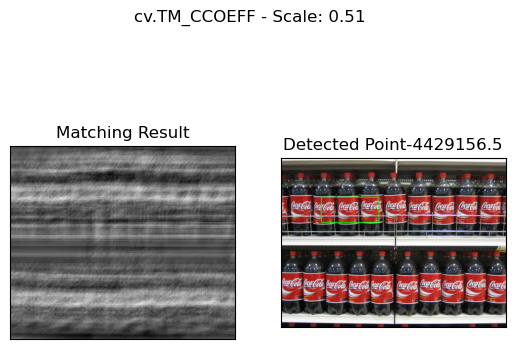

Max value for cv.TM_CCOEFF_NORMED at scale 0.51: 0.07957639545202255


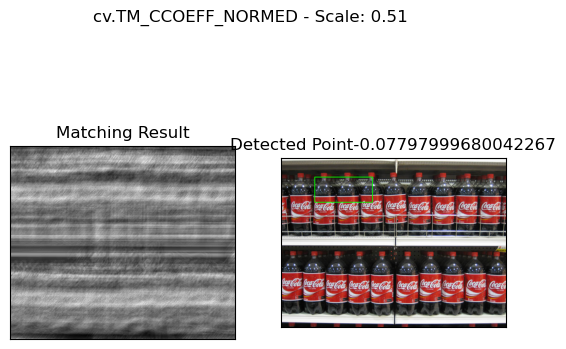

Max value for cv.TM_CCORR at scale 0.51: 20645818.0


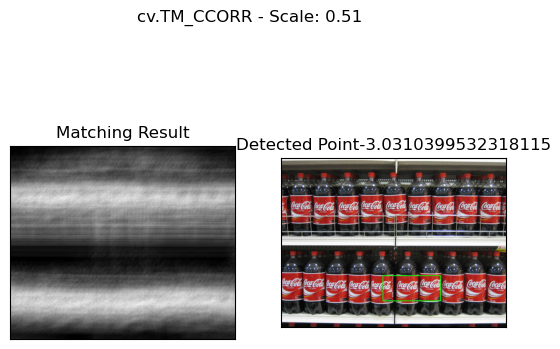

Max value for cv.TM_CCORR_NORMED at scale 0.51: 0.19440163671970367


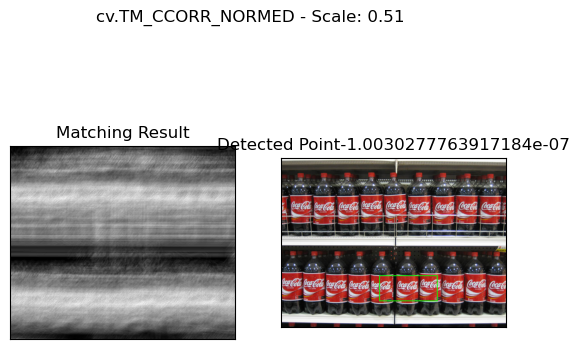

Min value for cv.TM_SQDIFF at scale 0.51: 58107476.0


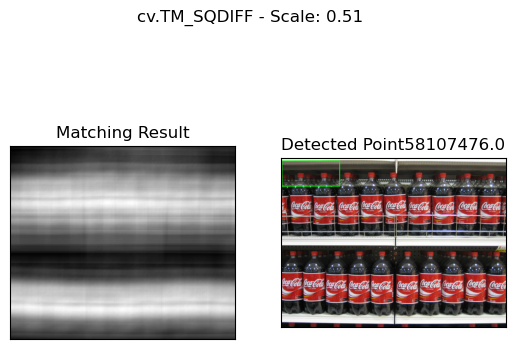

Min value for cv.TM_SQDIFF_NORMED at scale 0.51: 1.0


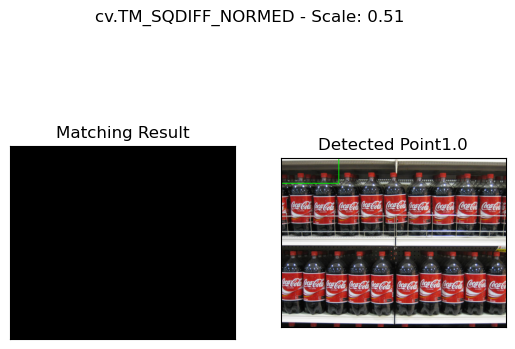

Max value for cv.TM_CCOEFF at scale 0.82: 14441133.0


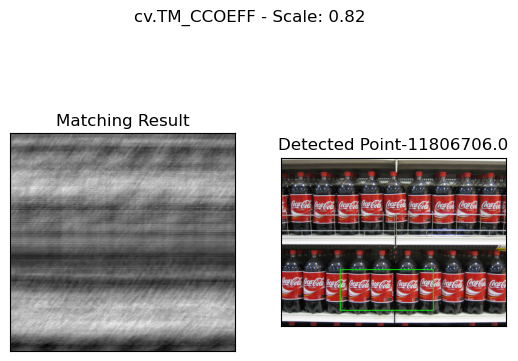

Max value for cv.TM_CCOEFF_NORMED at scale 0.82: 0.0652415007352829


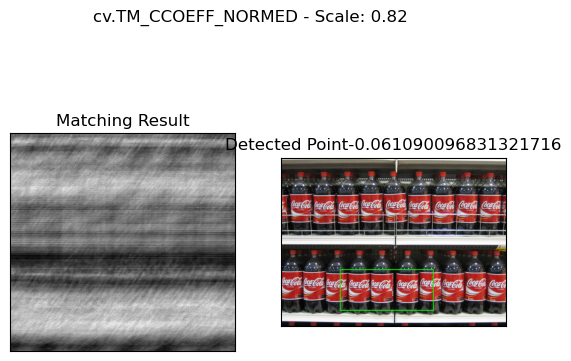

Max value for cv.TM_CCORR at scale 0.82: 44728784.0


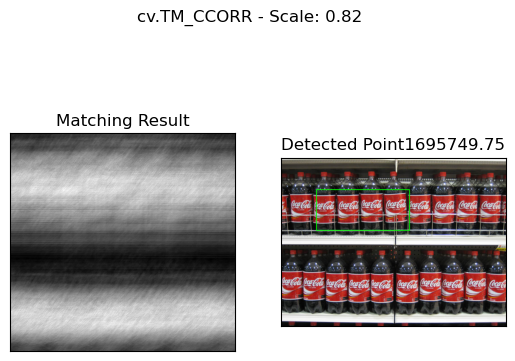

Max value for cv.TM_CCORR_NORMED at scale 0.82: 0.1731131672859192


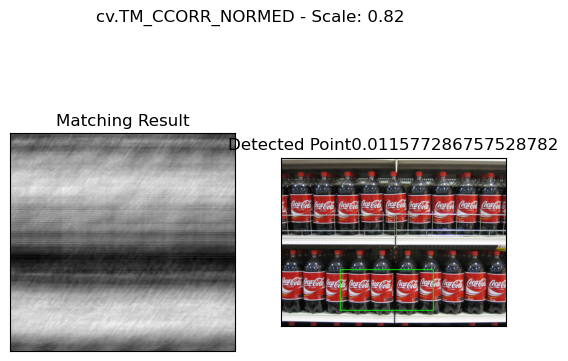

Min value for cv.TM_SQDIFF at scale 0.82: 239717824.0


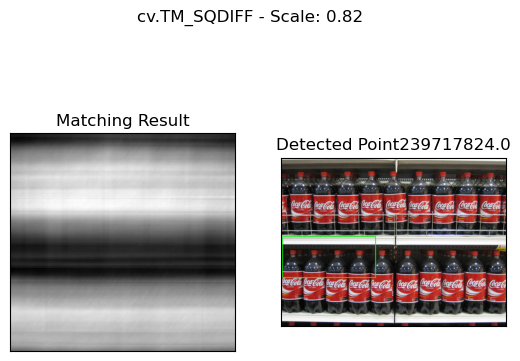

Min value for cv.TM_SQDIFF_NORMED at scale 0.82: 1.0


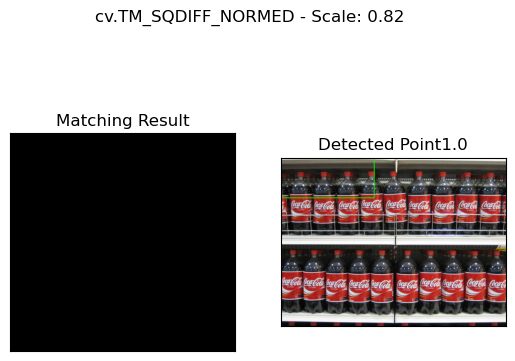

Max value for cv.TM_CCOEFF at scale 1.13: 28701906.0


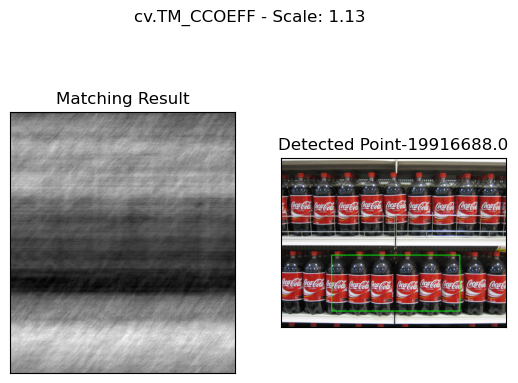

Max value for cv.TM_CCOEFF_NORMED at scale 1.13: 0.07725371420383453


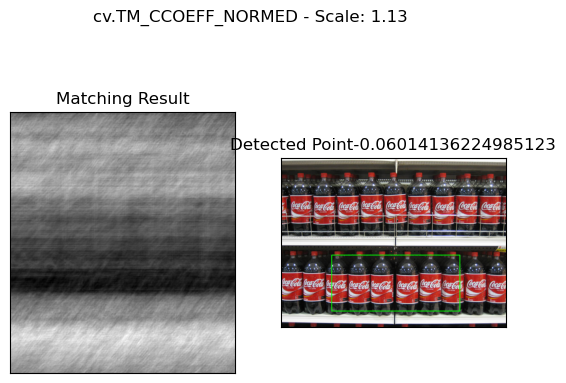

Max value for cv.TM_CCORR at scale 1.13: 71389296.0


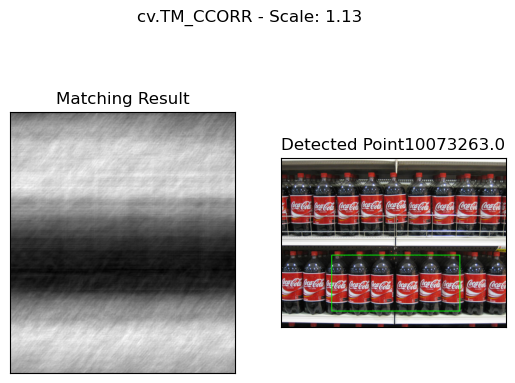

Max value for cv.TM_CCORR_NORMED at scale 1.13: 0.1722356379032135


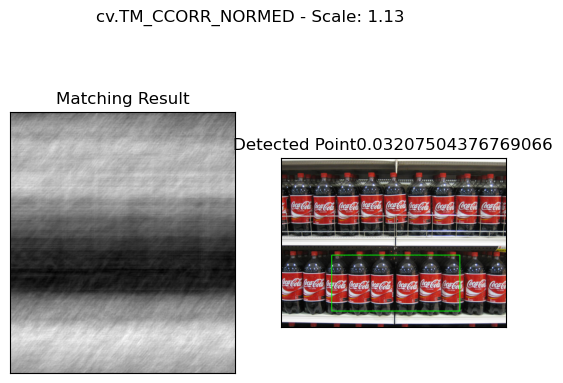

Min value for cv.TM_SQDIFF at scale 1.13: 571427392.0


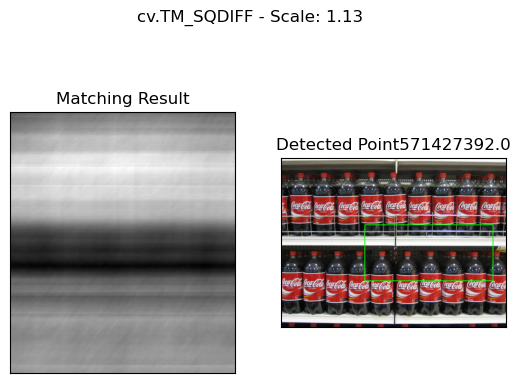

Min value for cv.TM_SQDIFF_NORMED at scale 1.13: 1.0


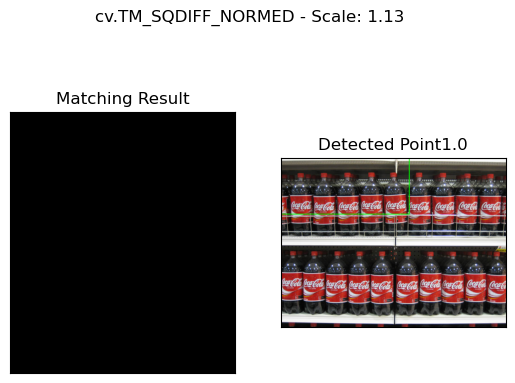

Max value for cv.TM_CCOEFF at scale 1.44: 39757352.0


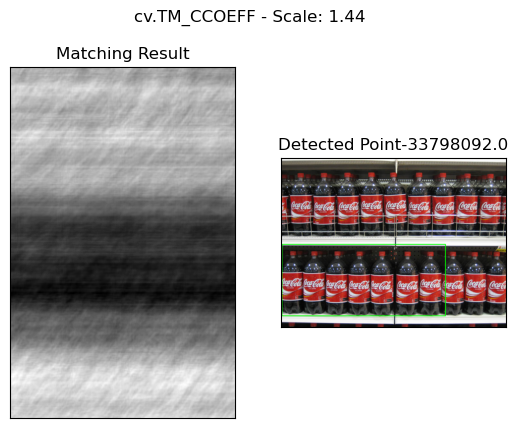

Max value for cv.TM_CCOEFF_NORMED at scale 1.44: 0.0721319243311882


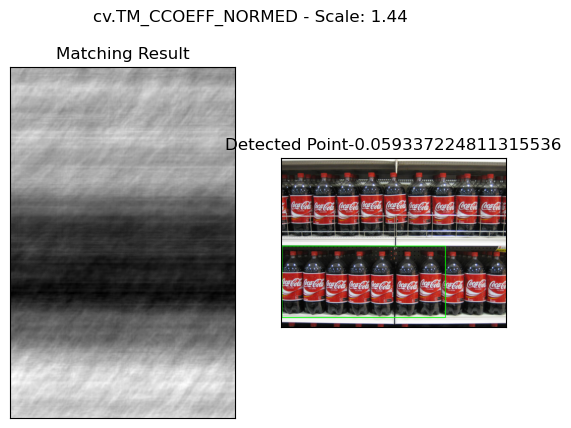

Max value for cv.TM_CCORR at scale 1.44: 107503152.0


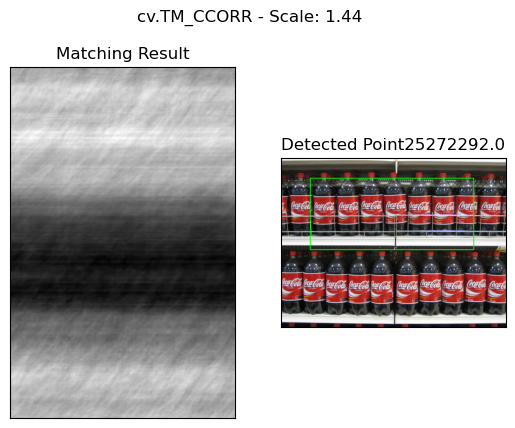

Max value for cv.TM_CCORR_NORMED at scale 1.44: 0.15832574665546417


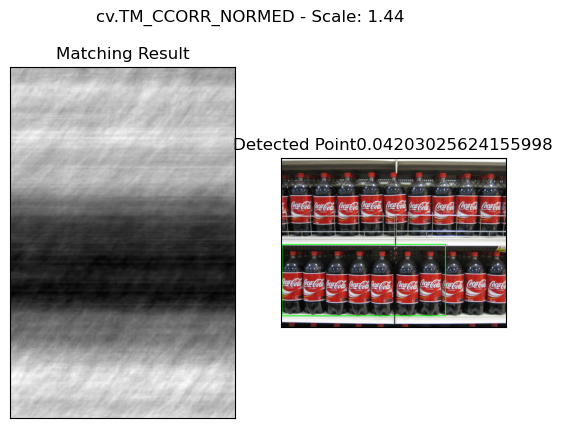

Min value for cv.TM_SQDIFF at scale 1.44: 1102297216.0


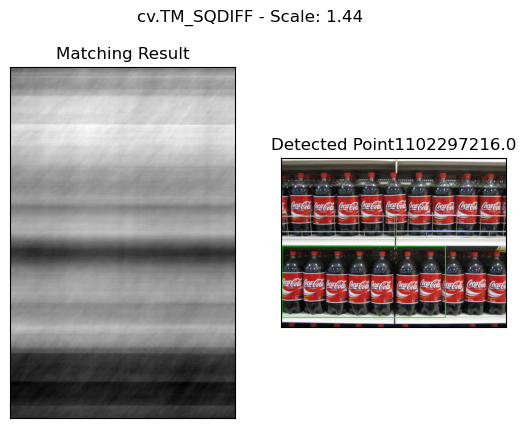

Min value for cv.TM_SQDIFF_NORMED at scale 1.44: 1.0


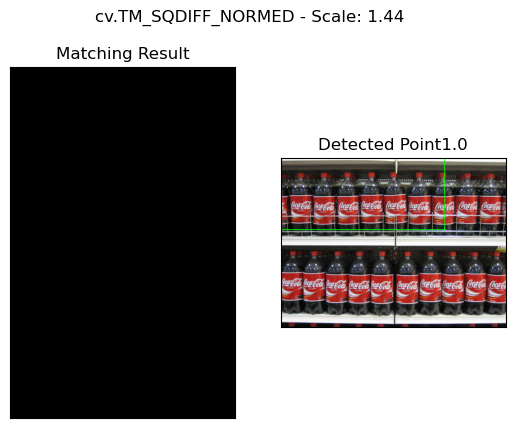

Max value for cv.TM_CCOEFF at scale 1.76: 49404024.0


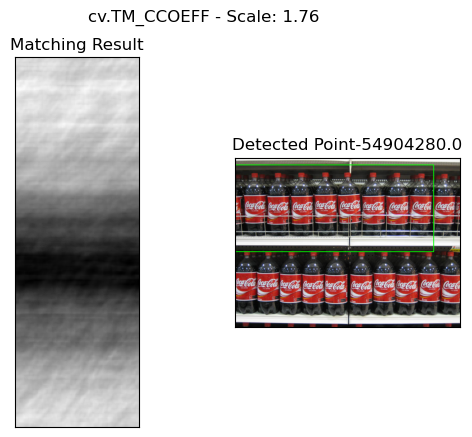

Max value for cv.TM_CCOEFF_NORMED at scale 1.76: 0.05945214629173279


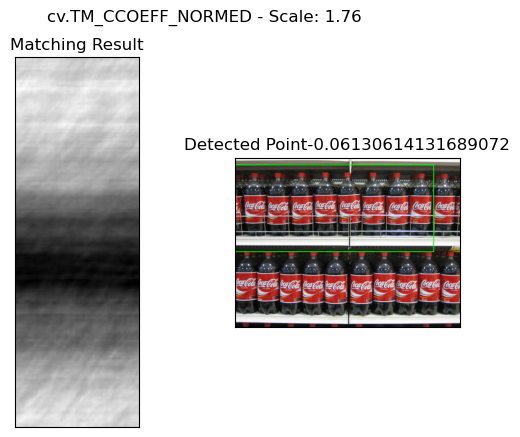

Max value for cv.TM_CCORR at scale 1.76: 136777152.0


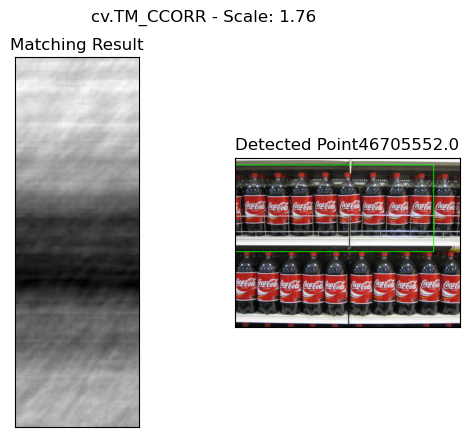

Max value for cv.TM_CCORR_NORMED at scale 1.76: 0.14893028140068054


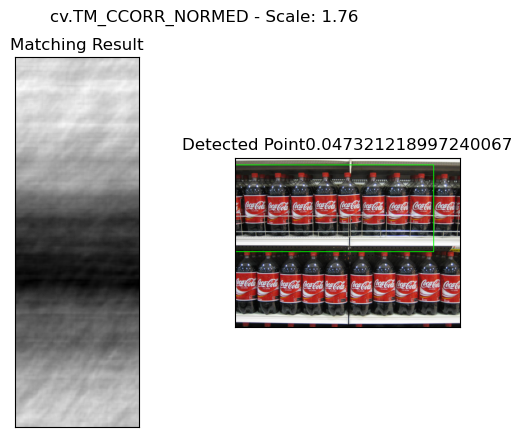

Min value for cv.TM_SQDIFF at scale 1.76: 1549151744.0


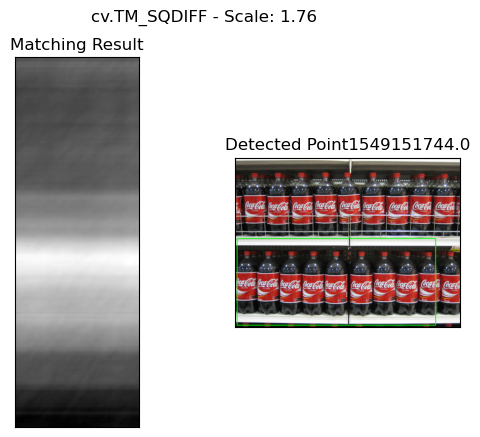

Min value for cv.TM_SQDIFF_NORMED at scale 1.76: 1.0


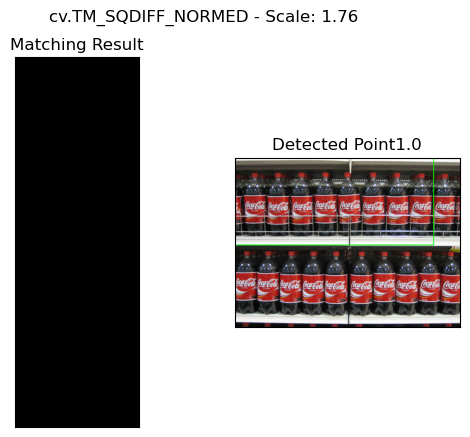

In [4]:
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Loop over different scales
for scale in np.linspace(0.2, 3, 10):
    resized_template = cv.resize(template, None, fx=scale, fy=scale)
    w, h = resized_template.shape[::-1]
    
    # Check if the resized template is larger than the image
    if resized_template.shape[0] > img_gray.shape[0] or resized_template.shape[1] > img_gray.shape[1]:
        continue
    
    for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img_gray, resized_template, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            print(f'Min value for {meth} at scale {scale:.2f}: {min_val}')
        else:
            top_left = max_loc
            print(f'Max value for {meth} at scale {scale:.2f}: {max_val}')
        
        # Marcamos
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida, top_left, bottom_right, (0,255,0), 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121), plt.imshow(res, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122), plt.imshow(img_salida)
        plt.title('Detected Point' + str(min_val)), plt.xticks([]), plt.yticks([])
        plt.suptitle(f'{meth} - Scale: {scale:.2f}')
        plt.show()


otra imagen

Imagen shape:(493, 715, 3)
Template shape:(175, 400)


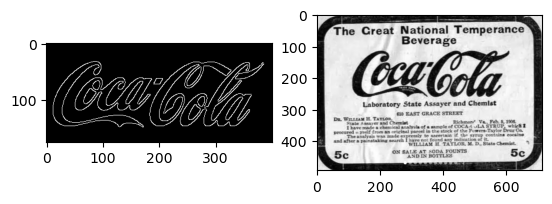

In [74]:
# Cargamos la imagen a procesar
img = cv.imread('./images/coca_retro_1.png')
template = cv.imread('./template/pattern.png',0)

img_rgb = cv.imread('./images/coca_retro_1.png')
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Aplico Canny
#=============
template = cv.Canny(template, threshold1=100, threshold2=490)
img_gray = cv.Canny(img, threshold1=100, threshold2=400)


print('Imagen shape:' + str(img.shape))
print('Template shape:' + str(template.shape))



plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rgb, cmap='gray')
plt.show()

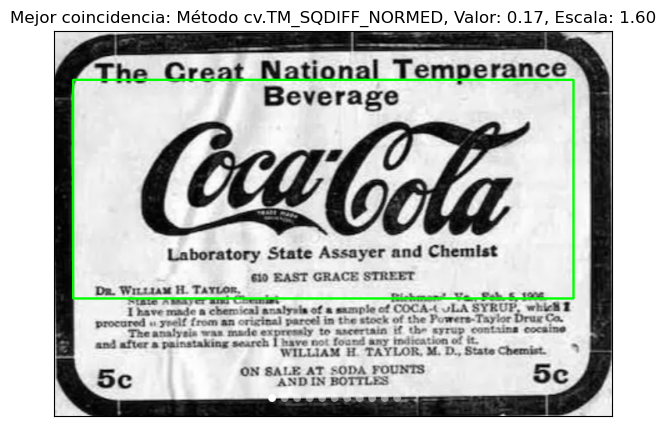

In [75]:
# Código para aplicar Template Matching y obtener el mejor valor de coincidencia
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen y la plantilla
img = cv.imread('./images/coca_retro_1.png')
template = cv.imread('./template/pattern.png', 0)

# Convertimos a escala de grises
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Establecemos el rango de escalas
scales = np.linspace(0.2, 1.6, num=15) 

# Métodos de coincidencia
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] 


# Inicializar las mejores coincidencias
best_value = None
best_scale = None
best_method = None
best_position = None

# Loop sobre las diferentes escalas
for scale in scales:
    # Redimensionamos la plantilla
    resized_template = cv.resize(template, None, fx=scale, fy=scale)
    w, h = resized_template.shape[::-1]
    
    # Verificamos que la plantilla no sea más grande que la imagen
    if resized_template.shape[0] > img_gray.shape[0] or resized_template.shape[1] > img_gray.shape[1]:
        continue

    # Iteramos sobre los diferentes métodos de coincidencia
    for meth in methods:
        method = eval(meth)
        # Aplicamos Template Matching
        result = cv.matchTemplate(img_gray, resized_template, method)
        
        # Encontramos el valor mínimo y máximo y sus ubicaciones
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Determinamos qué valor usar dependiendo del método
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:  # Métodos que buscan el mínimo
            current_best_value = min_val
            current_best_position = min_loc
        else:  # Métodos que buscan el máximo
            current_best_value = max_val
            current_best_position = max_loc

        # Actualizamos las mejores coincidencias
        if best_value is None or (current_best_value < best_value if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else current_best_value > best_value):
            best_value = current_best_value
            best_scale = scale
            best_method = meth
            best_position = current_best_position

# Mostrar el resultado de la mejor coincidencia
img_detected = img.copy()
bottom_right = (best_position[0] + w, best_position[1] + h)
cv.rectangle(img_detected, best_position, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img_detected, cv.COLOR_BGR2RGB))
plt.title(f'Mejor coincidencia: Método {best_method}, Valor: {best_value:.2f}, Escala: {best_scale:.2f}')
plt.xticks([]), plt.yticks([])
plt.show()


Rango de escalas: [0.3575     0.91361111 1.46972222 2.02583333 2.58194444 3.13805556
 3.69416667 4.25027778 4.80638889 5.3625    ]


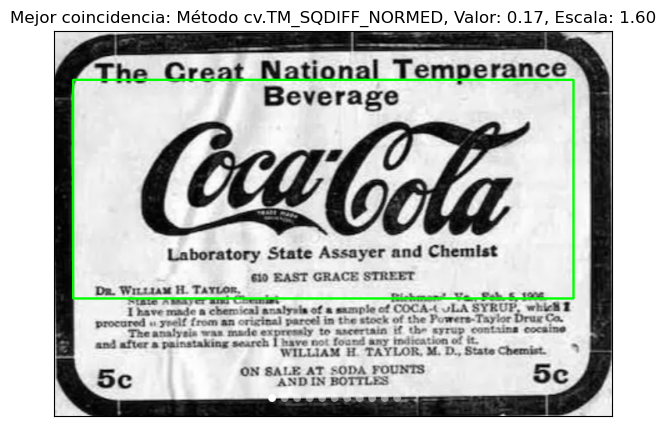

In [85]:
# Código para aplicar Template Matching y obtener la mejor escala
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Dimensiones de la imagen y la plantilla
height_img, width_img = 493, 715
height_template, width_template = 175, 400

# Calcular escalas en función del tamaño de la imagen
min_scale = min(height_img / height_template, width_img / width_template) * 0.2 # 50% del tamaño original
max_scale = min(height_img / height_template, width_img / width_template) * 3.0 # 200% del tamaño original

# Definir el rango de escalas
scales = np.linspace(min_scale, max_scale, num=10)  # 10 valores de escala entre el mínimo y máximo

print("Rango de escalas:", scales)


# Cargar la imagen y la plantilla
img = cv.imread('./images/coca_retro_1.png')
template = cv.imread('./template/pattern.png', 0)

# Convertimos a escala de grises
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Establecemos el rango de escalas
scales = np.linspace(0.2, 1.6, num=15) 

# Métodos de coincidencia
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'] 


# Inicializar las mejores coincidencias
best_value = None
best_scale = None
best_method = None
best_position = None

# Loop sobre las diferentes escalas
for scale in scales:
    # Redimensionamos la plantilla
    resized_template = cv.resize(template, None, fx=scale, fy=scale)
    w, h = resized_template.shape[::-1]
    
    # Verificamos que la plantilla no sea más grande que la imagen
    if resized_template.shape[0] > img_gray.shape[0] or resized_template.shape[1] > img_gray.shape[1]:
        continue

    # Iteramos sobre los diferentes métodos de coincidencia
    for meth in methods:
        method = eval(meth)
        # Aplicamos Template Matching
        result = cv.matchTemplate(img_gray, resized_template, method)
        
        # Encontramos el valor mínimo y máximo y sus ubicaciones
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Determinamos qué valor usar dependiendo del método
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:  # Métodos que buscan el mínimo
            current_best_value = min_val
            current_best_position = min_loc
        else:  # Métodos que buscan el máximo
            current_best_value = max_val
            current_best_position = max_loc

        # Actualizamos las mejores coincidencias
        if best_value is None or (current_best_value < best_value if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else current_best_value > best_value):
            best_value = current_best_value
            best_scale = scale
            best_method = meth
            best_position = current_best_position

# Mostrar el resultado de la mejor coincidencia
img_detected = img.copy()
bottom_right = (best_position[0] + w, best_position[1] + h)
cv.rectangle(img_detected, best_position, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img_detected, cv.COLOR_BGR2RGB))
plt.title(f'Mejor coincidencia: Método {best_method}, Valor: {best_value:.2f}, Escala: {best_scale:.2f}')
plt.xticks([]), plt.yticks([])
plt.show()
